In [1]:
# import Required Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3,preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import load_img,ImageDataGenerator
from tensorflow.keras.models import Sequential
from glob import glob

In [2]:
# Load Dataset
train_set = "C:\\Users\\medipalle.tendulkar\\Desktop\\Kaggle DataSets\\Cotton Disease Prediction\\train"
test_set = "C:\\Users\\medipalle.tendulkar\\Desktop\\Kaggle DataSets\\Cotton Disease Prediction\\test"

In [3]:
# Import the Inception V3 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights
IMAGE_SIZE = [224,224]
inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [4]:
# Do not train existing weights

for layer in inception.layers:
    layer.trainable = False

In [5]:
folders = glob("C:\\Users\\medipalle.tendulkar\\Desktop\\Kaggle DataSets\\Cotton Disease Prediction\\train\\*") # len(folders) = 4

In [6]:
# our layers - you can add more if you want
x = Flatten()(inception.output) #shape=(None, 51200)

In [7]:
prediction = Dense(len(folders),activation='softmax')(x)

In [8]:
# create a model object
model = Model(inputs=inception.input, outputs=prediction)

In [9]:
# view the structure of the model
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
_______________________________________________________________________________________

In [10]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [11]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                  shear_range = 0.2,
                                  zoom_range = 0.2,
                                  horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [12]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('C:\\Users\\medipalle.tendulkar\\Desktop\\Kaggle DataSets\\Cotton Disease Prediction\\train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('C:\\Users\\medipalle.tendulkar\\Desktop\\Kaggle DataSets\\Cotton Disease Prediction\\test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 1951 images belonging to 4 classes.
Found 18 images belonging to 4 classes.


In [13]:
incep = model.fit_generator(training_set,
                            validation_data = test_set,
                            epochs = 20,
                            steps_per_epoch = len(training_set),
                            validation_steps=len(test_set))

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/20
61/61 [==============================] - 89s 1s/step - loss: 3.0047 - accuracy: 0.7176 - val_loss: 0.3078 - val_accuracy: 0.8889
Epoch 2/20
61/61 [==============================] - 94s 2s/step - loss: 0.5549 - accuracy: 0.8980 - val_loss: 0.0367 - val_accuracy: 1.0000
Epoch 3/20
61/61 [==============================] - 95s 2s/step - loss: 0.5491 - accuracy: 0.9088 - val_loss: 0.3042 - val_accuracy: 0.8889
Epoch 4/20
61/61 [==============================] - 104s 2s/step - loss: 0.4941 - accuracy: 0.9159 - val_loss: 0.0383 - val_accuracy: 1.0000
Epoch 5/20
61/61 [==============================] - 108s 2s/step - loss: 0.3444 - accuracy: 0.9354 - val_loss: 0.0015 - val_accuracy: 1.0000
Epoch 6/20
61/61 [==============================] - 107s 2s/step - loss: 0.4369 - accuracy: 0.9282 - val_loss: 0.0289 - val_accuracy: 1.0000
Epoch 7/20
61/61 [==============================] - 107s 2s/step - loss: 0.4489 -

In [14]:
## Plotting the Loss and Accuracy

In [15]:
acc = incep.history['accuracy']
val_acc = incep.history['val_accuracy']
loss = incep.history['loss']
val_loss = incep.history['val_loss']
epochs=range(len(acc))

Text(0.5, 1.0, 'Training and Validation Accuracy')

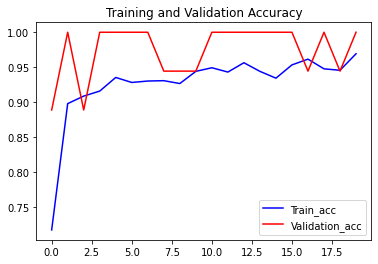

In [16]:
plt.plot(epochs,acc,label='Train_acc',color='blue')
plt.plot(epochs,val_acc,label='Validation_acc',color='red')
plt.legend()
plt.title("Training and Validation Accuracy")

Text(0.5, 1.0, 'Training and Validation loss')

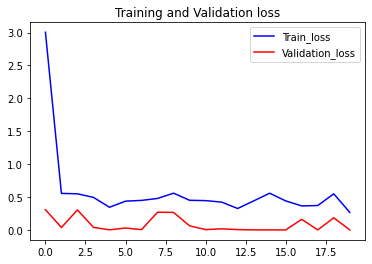

In [17]:
plt.plot(epochs,loss,label='Train_loss',color='blue')
plt.plot(epochs,val_loss,label='Validation_loss',color='red')
plt.legend()
plt.title("Training and Validation loss")

## Prediction

In [18]:
class_dict = {0:'diseased cotton leaf',
              1:'diseased cotton plant',
              2:'fresh cotton leaf',
              3:'fresh cotton plant' }

In [19]:
import cv2
img_path =  'C:\\Users\\medipalle.tendulkar\\Desktop\\Kaggle DataSets\\Cotton Disease Prediction\\test data comp files\\disleaf.jpg'
img = image.load_img(img_path, target_size=(224, 224))
 # Preprocessing the image
x = image.img_to_array(img)
# x = np.true_divide(x, 255)
## Scaling
x=x/255
x = np.expand_dims(x, axis=0)
preds = model.predict(x)
preds=np.argmax(preds, axis=1)
pred_class = class_dict[preds[0]]

print(pred_class)

diseased cotton leaf


In [20]:
# Save the model

model.save("incep.h5")